In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files

In [3]:
data=files.upload()

Saving stroke.csv to stroke (1).csv


In [4]:
data=pd.read_csv('/content/stroke.csv')

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.shape

(5110, 12)

In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
import sklearn
from sklearn.impute import KNNImputer

In [10]:
imputer = KNNImputer(n_neighbors=2)
data['bmi']=imputer.fit_transform(data[['bmi']])

In [11]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

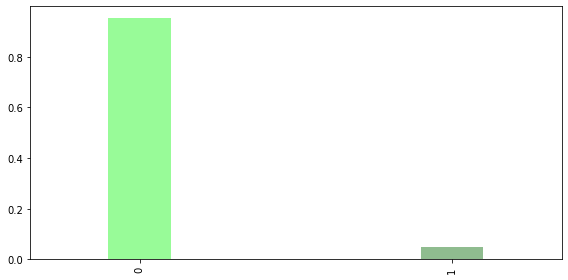

In [12]:
fig, axes=plt.subplots(figsize=(8,4))
data['stroke'].value_counts(normalize=True).plot.bar(width=.2, color=('palegreen','darkseagreen'))
plt.tight_layout()
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
numerical_data=data[['hypertension','heart_disease','bmi','avg_glucose_level','age']]
numerical_data.head()

,hypertension,heart_disease,bmi,avg_glucose_level,age
0,0,1,36.600000,228.69,67.0
1,0,0,28.893237,202.21,61.0
2,0,1,32.500000,105.92,80.0
3,0,0,34.400000,171.23,49.0
4,1,0,24.000000,174.12,79.0


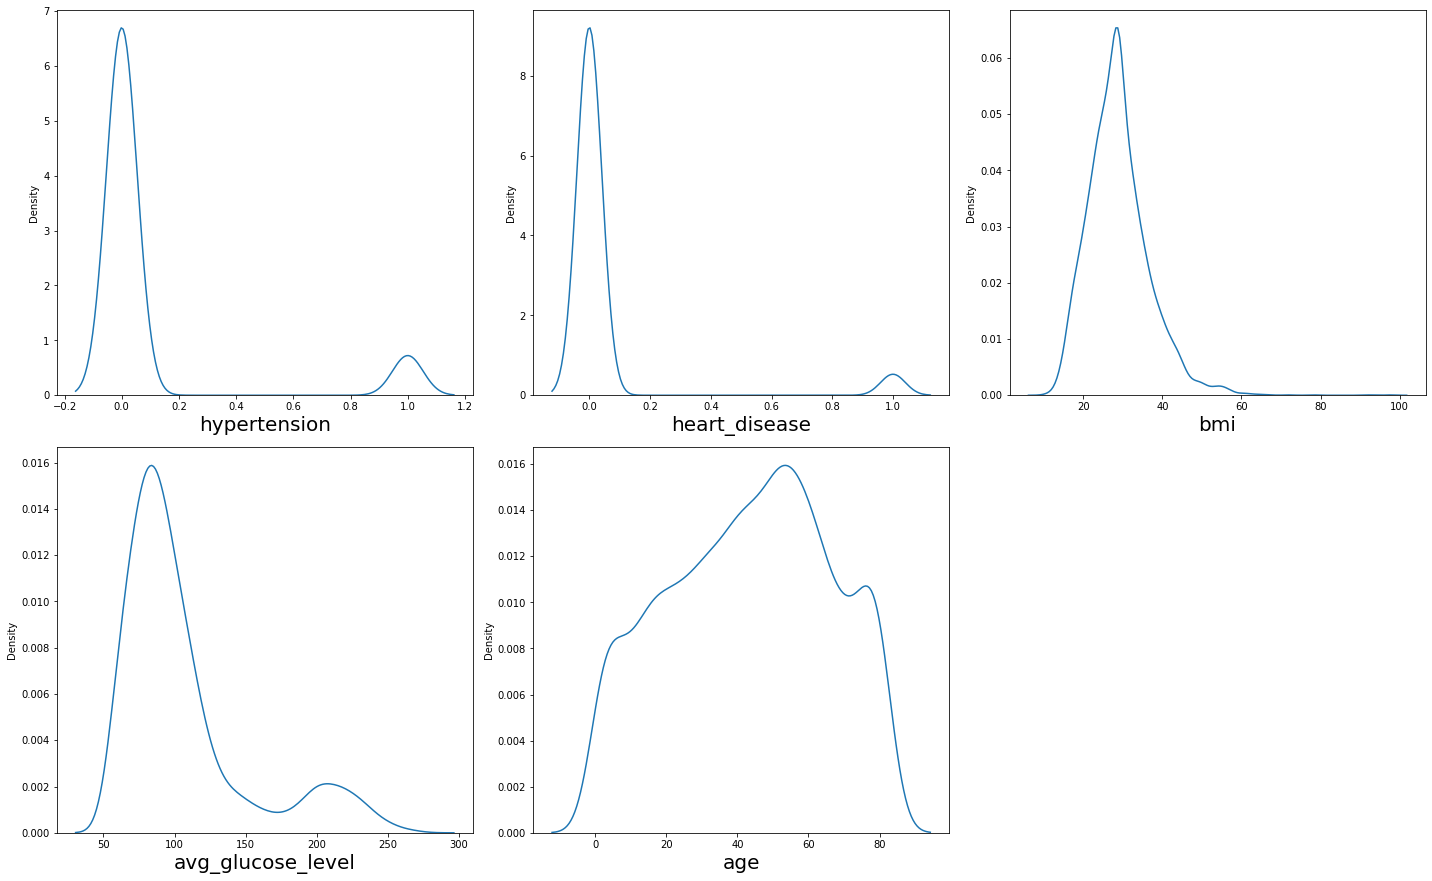

In [15]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for x in numerical_data:
  if plotnumber<=15:
    ax=plt.subplot(5,3,plotnumber)
    sns.kdeplot(numerical_data[x])
    plt.xlabel(x, fontsize=20)

  plotnumber+=1
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


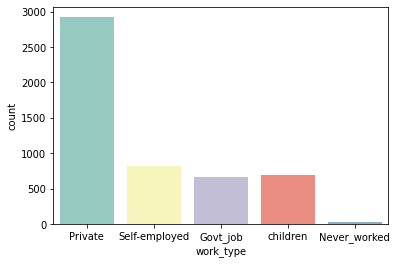

In [16]:
sns.countplot(data['work_type'],palette="Set3")

In [17]:
categorical_data = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

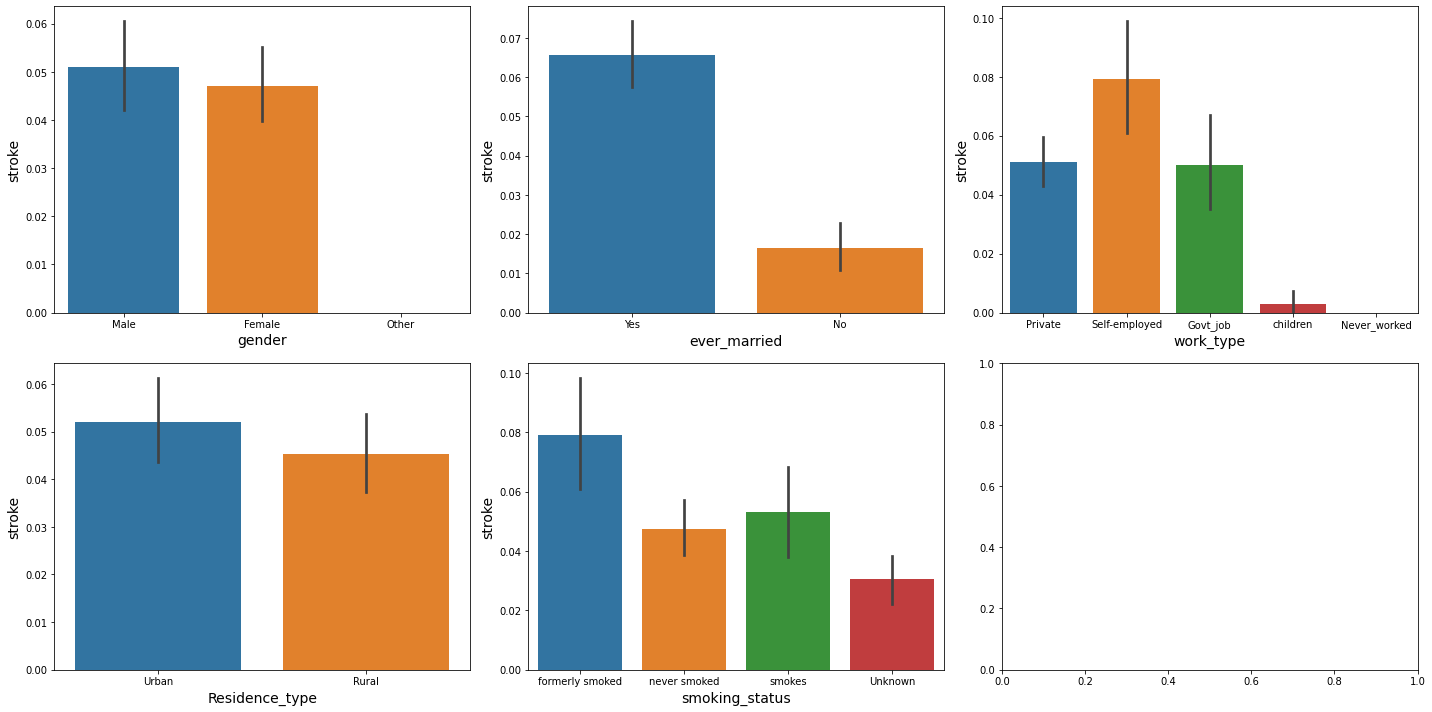

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_data):
    sns.barplot(data[c], data[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

In [19]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [19]:
gender=pd.get_dummies(data[['gender']],drop_first=True)
married=pd.get_dummies(data[['ever_married']],drop_first=True)
work=pd.get_dummies(data[['work_type']],drop_first=True)
residence=pd.get_dummies(data[['Residence_type']],drop_first=True)
smoking=pd.get_dummies(data[['smoking_status']],drop_first=True)
data = pd.concat([data, gender, married, work, residence, smoking], axis = 1)
data.head()

In [20]:
data=data.drop(columns=categorical_data,axis=1)

In [21]:
data=data.drop(columns='id',axis=1)

In [22]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

### Split dataset into train and test

In [23]:
x=data.drop(columns="stroke", axis=1)
y=data[["stroke"]]

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y, test_size=0.33, random_state=25)

In [26]:
from sklearn import svm
svm_model=svm.SVC(kernel='linear',gamma='auto', C=2)
svm_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2, gamma='auto', kernel='linear')

In [27]:
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier(random_state=1)
decision_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier()
RandomForest_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [29]:
from sklearn.linear_model import LogisticRegression
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
y_predict_svm_model=svm_model.predict(x_test)
y_predict_decision_model=decision_model.predict(x_test)
y_predict_RandomForest_model=RandomForest_model.predict(x_test)
y_predict_LogisticRegression_model=LogisticRegression_model.predict(x_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print("Classification_report of svm_model")
print(classification_report(y_test,y_predict_svm_model))
print("Classification_report of decision_tree_model")
print(classification_report(y_test,y_predict_decision_model))
print("Classification_report of RandomForest_model")
print(classification_report(y_test,y_predict_RandomForest_model))
print("Classification_report of LogisticRegression_model")
print(classification_report(y_test,y_predict_LogisticRegression_model))


Classification_report of svm_model
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1604
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.90      0.95      0.93      1687

Classification_report of decision_tree_model
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1604
           1       0.10      0.11      0.11        83

    accuracy                           0.91      1687
   macro avg       0.53      0.53      0.53      1687
weighted avg       0.91      0.91      0.91      1687

Classification_report of RandomForest_model
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1604
           1       0.38      0.04      0.07        83

    accuracy                           0.95      1687
   m

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat